<a href="https://colab.research.google.com/github/Zaicevvv/GoIT-DSandML-Private/blob/main/HW12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cтворити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

Завантажимо датасет

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Нормалізуємо дані

In [4]:
x_train = x_train / 255
x_test = x_test / 255

Створимо функцію відслідковування історії навчання

In [5]:
def plot_history(hst):
  plt.figure(figsize=(13,4))

  plt.subplot(1, 2, 1)
  plt.plot(hst.history['loss'], label='train')
  plt.plot(hst.history['val_loss'], label='test')
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot([round(100*e,2) for e in hst.history['sparse_categorical_accuracy']], label='train')
  plt.plot([round(100*e,2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
  plt.title('Accuracy')
  plt.ylim(0, 100)
  plt.legend()
  plt.tight_layout()
  plt.show()

Побудуємо модель

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10)
    ])
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=[SparseCategoricalAccuracy()]
    )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Навчимо модель

In [7]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50
469/469 [==============================] - 4s 7ms/step - loss: 0.5458 - sparse_categorical_accuracy: 0.8121 - val_loss: 0.4926 - val_sparse_categorical_accuracy: 0.8303
Epoch 2/50
469/469 [==============================] - 3s 6ms/step - loss: 0.4021 - sparse_categorical_accuracy: 0.8597 - val_loss: 0.4093 - val_sparse_categorical_accuracy: 0.8547
Epoch 3/50
469/469 [==============================] - 4s 9ms/step - loss: 0.3586 - sparse_categorical_accuracy: 0.8734 - val_loss: 0.3839 - val_sparse_categorical_accuracy: 0.8640
Epoch 4/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.3758 - val_sparse_categorical_accuracy: 0.8670
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.3202 - sparse_categorical_accuracy: 0.8857 - val_loss: 0.3891 - val_sparse_categorical_accuracy: 0.8609
Epoch 6/50
469/469 [==============================] - 3s 6ms/step - loss: 0.3039 - sparse_categorica

Подивимось на історію

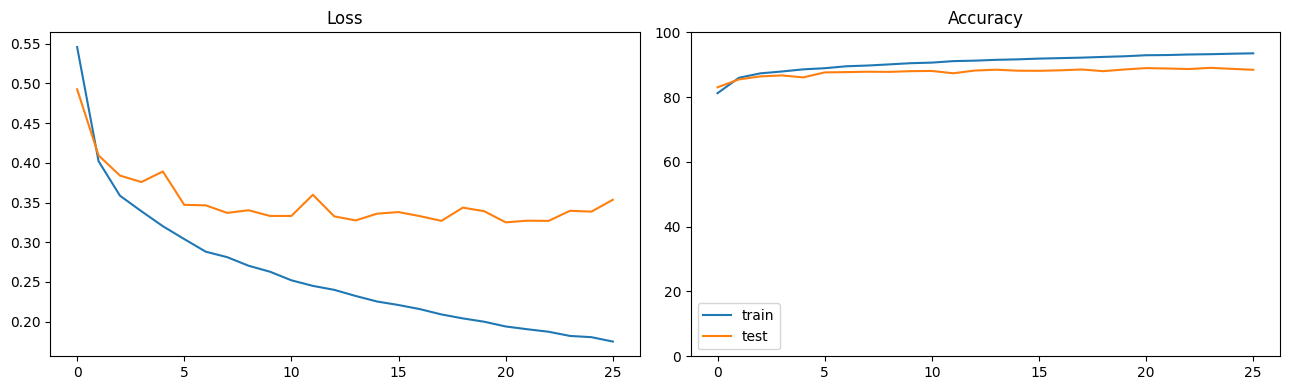

In [8]:
plot_history(history)

Судячи з графіків 4 епохи буде достатньо. Перенавчимо модель і подивимось на історію знову

Epoch 1/4
469/469 [==============================] - 4s 7ms/step - loss: 0.5503 - sparse_categorical_accuracy: 0.8123 - val_loss: 0.4718 - val_sparse_categorical_accuracy: 0.8348
Epoch 2/4
469/469 [==============================] - 5s 10ms/step - loss: 0.4040 - sparse_categorical_accuracy: 0.8585 - val_loss: 0.4033 - val_sparse_categorical_accuracy: 0.8587
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.3656 - sparse_categorical_accuracy: 0.8703 - val_loss: 0.3961 - val_sparse_categorical_accuracy: 0.8613
Epoch 4/4
469/469 [==============================] - 3s 6ms/step - loss: 0.3433 - sparse_categorical_accuracy: 0.8773 - val_loss: 0.3986 - val_sparse_categorical_accuracy: 0.8595


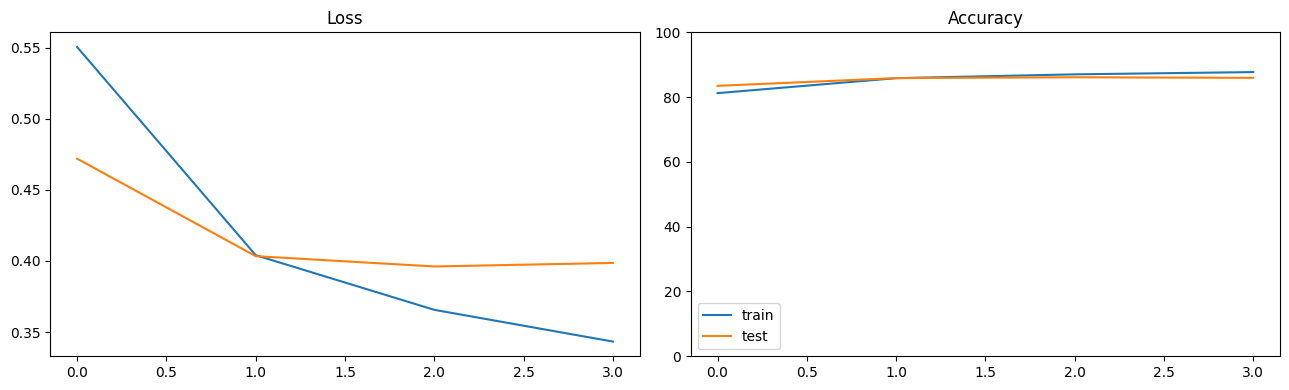

In [13]:
history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test))
plot_history(history)

Оцінимо модель

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.3986 - sparse_categorical_accuracy: 0.8595


0.859499990940094

86% буде замало, спробуємо додати шар дропаут. Побудуємо нову модель, навчимо і перевіримо її

0.05


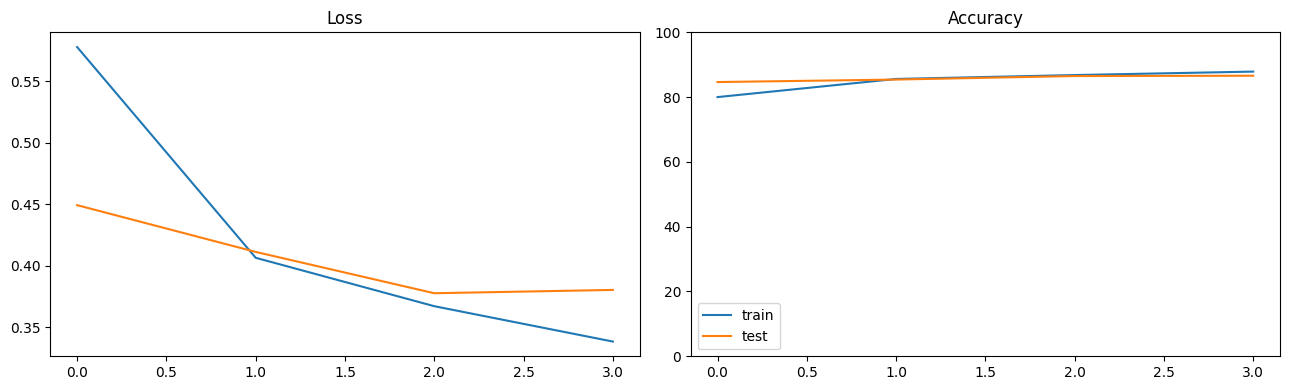

313/313 [==============================] - 1s 5ms/step - loss: 0.3802 - sparse_categorical_accuracy: 0.8660
0.8659999966621399
0.1


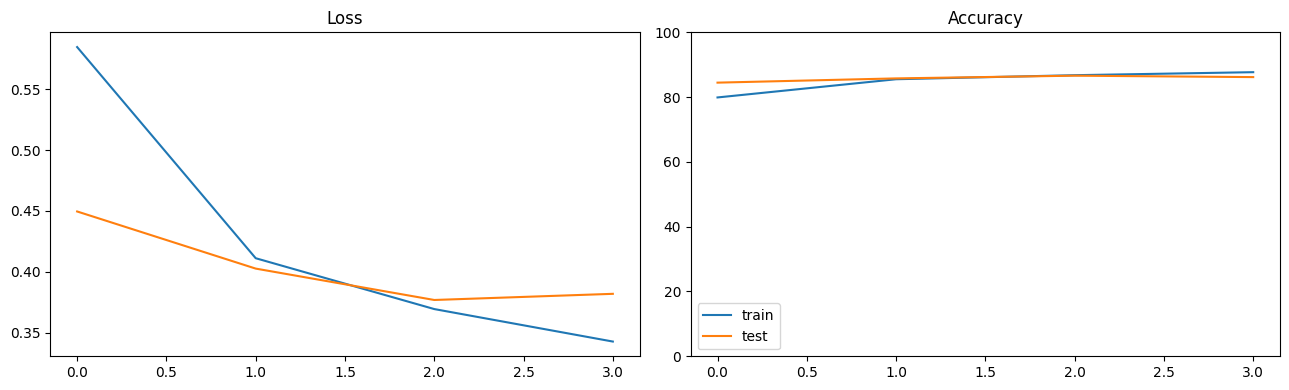

313/313 [==============================] - 1s 2ms/step - loss: 0.3819 - sparse_categorical_accuracy: 0.8618
0.8618000149726868
0.15


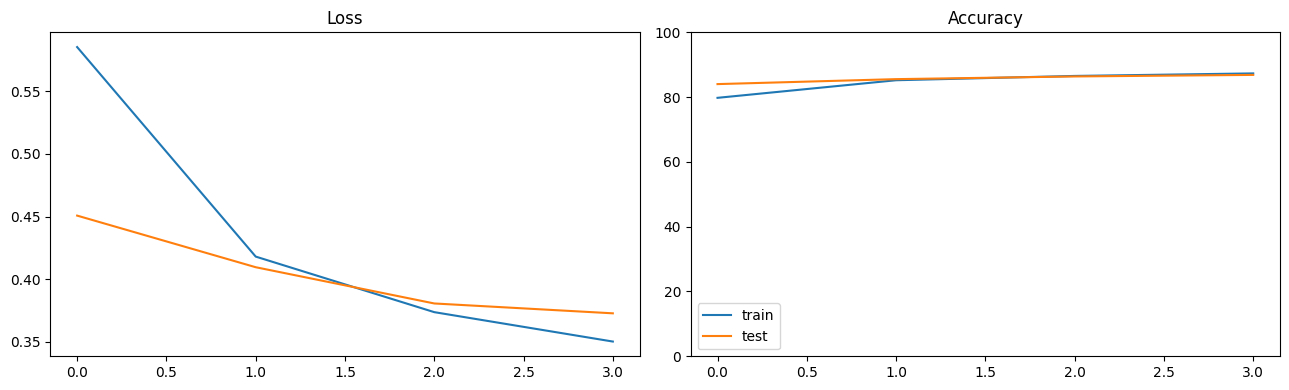

313/313 [==============================] - 1s 2ms/step - loss: 0.3726 - sparse_categorical_accuracy: 0.8686
0.8686000108718872
0.2


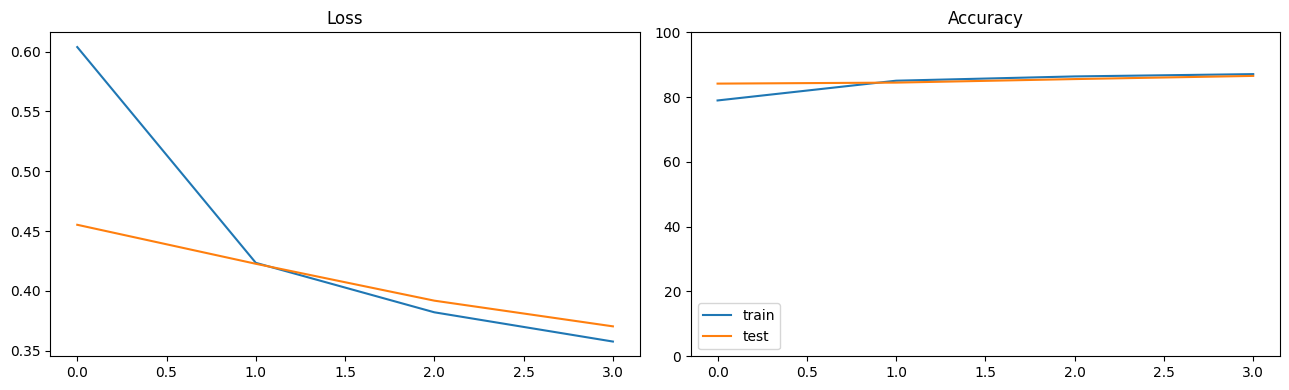

313/313 [==============================] - 1s 2ms/step - loss: 0.3704 - sparse_categorical_accuracy: 0.8655
0.8654999732971191
0.25


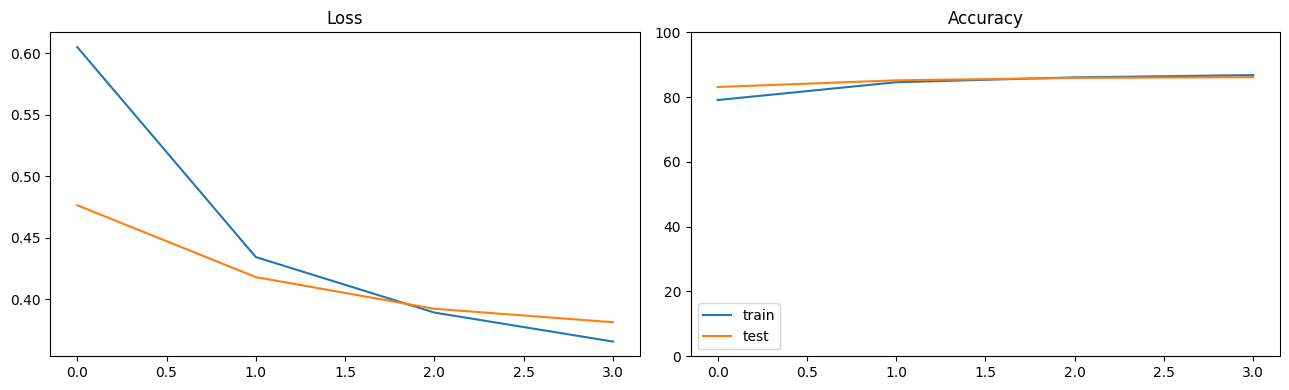

313/313 [==============================] - 1s 2ms/step - loss: 0.3811 - sparse_categorical_accuracy: 0.8617
0.8616999983787537


In [17]:
from tensorflow.keras.layers import Dropout

for drr in [0.05, 0.1, 0.15, 0.2, 0.25]:
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(drr),
        Dense(10)
        ])
    model.compile(
        loss=SparseCategoricalCrossentropy(from_logits=True),
        optimizer=Adam(learning_rate=0.001),
        metrics=[SparseCategoricalAccuracy()]
        )

    print(drr)
    history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(test_acc)

Це не допомогло, зменшимо batch_size

0.1


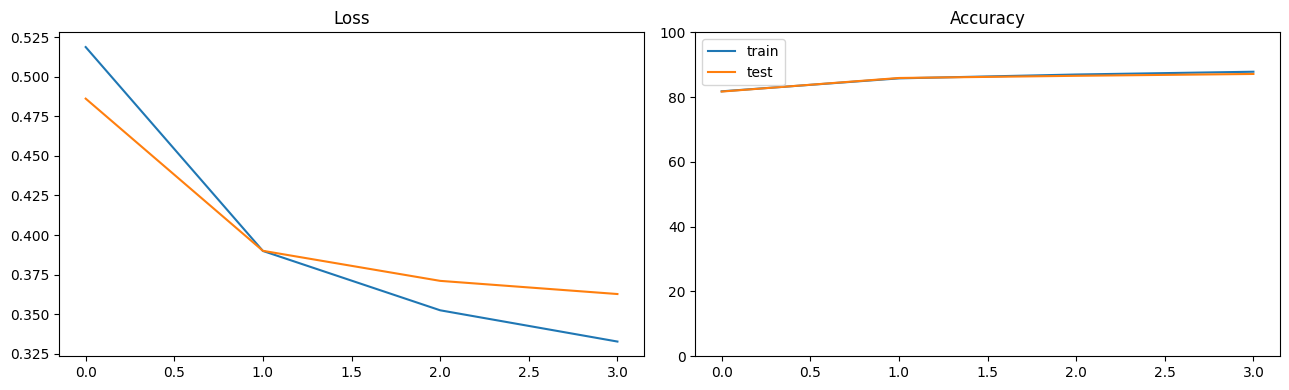

313/313 [==============================] - 1s 2ms/step - loss: 0.3628 - sparse_categorical_accuracy: 0.8715
0.8715000152587891
0.15


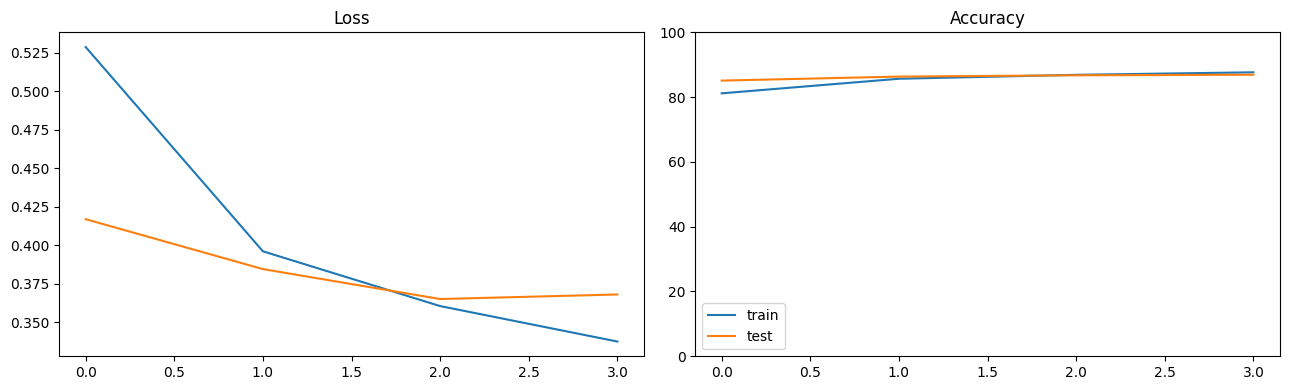

313/313 [==============================] - 1s 4ms/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8691
0.8690999746322632
0.2


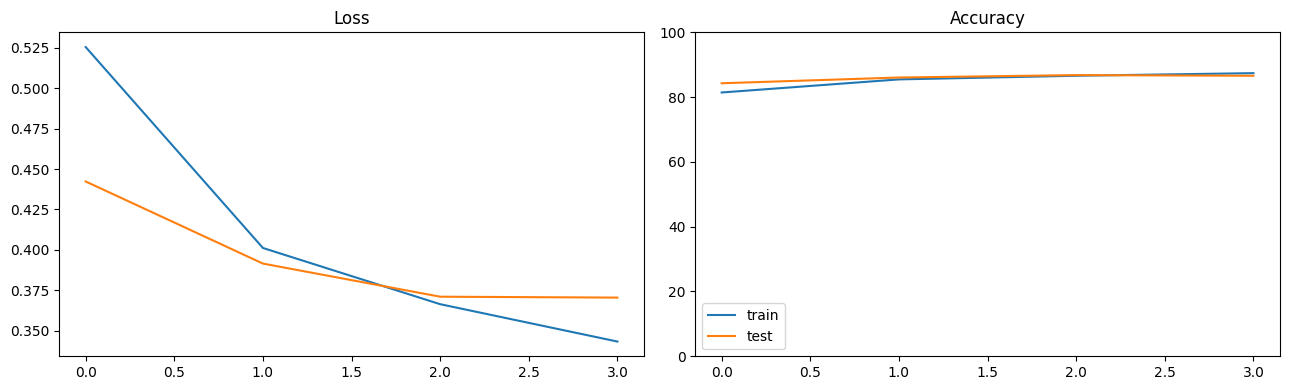

313/313 [==============================] - 1s 2ms/step - loss: 0.3705 - sparse_categorical_accuracy: 0.8659
0.8658999800682068
0.25


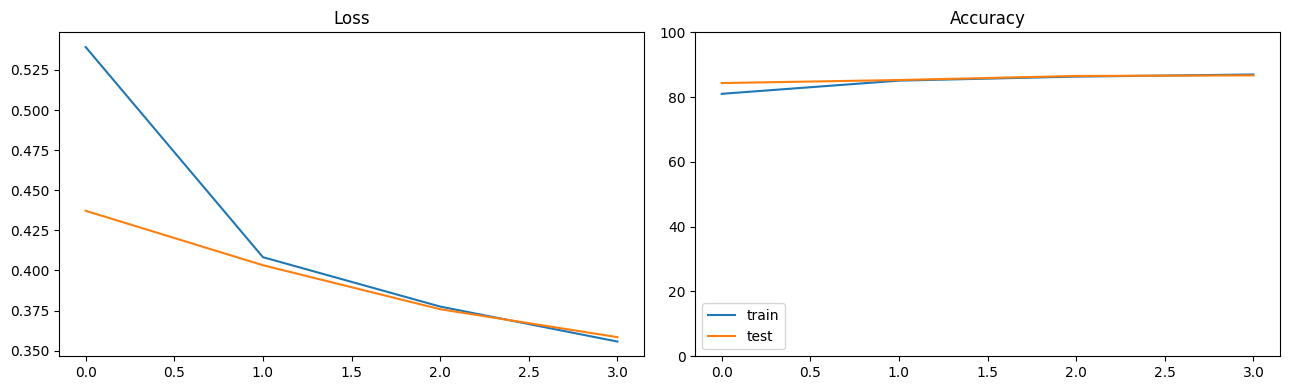

313/313 [==============================] - 1s 4ms/step - loss: 0.3584 - sparse_categorical_accuracy: 0.8671
0.8671000003814697


In [18]:
for drr in [0.1, 0.15, 0.2, 0.25]:
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dropout(drr),
        Dense(10)
        ])
    model.compile(
        loss=SparseCategoricalCrossentropy(from_logits=True),
        optimizer=Adam(learning_rate=0.001),
        metrics=[SparseCategoricalAccuracy()]
        )

    print(drr)
    history = model.fit(x_train, y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=0)
    plot_history(history)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(test_acc)

Схоже, що 0.1 буде оптимальним. Ускладнимо нашу модель, додамо ще один шар

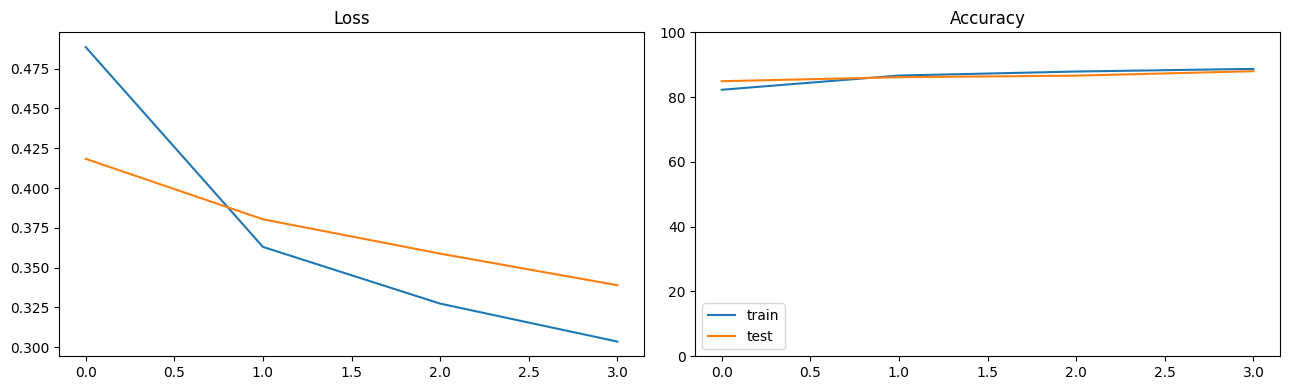

313/313 [==============================] - 1s 5ms/step - loss: 0.3390 - sparse_categorical_accuracy: 0.8800


0.8799999952316284

In [19]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.1),
    Dense(10)
    ])
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.001),
    metrics=[SparseCategoricalAccuracy()]
    )

history = model.fit(x_train, y_train, epochs=4, batch_size=32, validation_data=(x_test, y_test), verbose=0)
plot_history(history)
test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

Все ще не достатньо, змінимо тактику, додамо згорткових шарів, захотенкодимо "у" і додамо діменшн до "х"

In [20]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
  ])
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(x_test, y_test)
test_acc

Epoch 1/50
375/375 [==============================] - 49s 127ms/step - loss: 0.7483 - accuracy: 0.7292 - val_loss: 0.4507 - val_accuracy: 0.8281
Epoch 2/50
375/375 [==============================] - 50s 134ms/step - loss: 0.4815 - accuracy: 0.8239 - val_loss: 0.3766 - val_accuracy: 0.8618
Epoch 3/50
375/375 [==============================] - 54s 143ms/step - loss: 0.4188 - accuracy: 0.8486 - val_loss: 0.3400 - val_accuracy: 0.8763
Epoch 4/50
375/375 [==============================] - 49s 131ms/step - loss: 0.3824 - accuracy: 0.8621 - val_loss: 0.3222 - val_accuracy: 0.8781
Epoch 5/50
375/375 [==============================] - 48s 128ms/step - loss: 0.3558 - accuracy: 0.8717 - val_loss: 0.2995 - val_accuracy: 0.8917
Epoch 6/50
375/375 [==============================] - 50s 133ms/step - loss: 0.3377 - accuracy: 0.8776 - val_loss: 0.2948 - val_accuracy: 0.8902
Epoch 7/50
375/375 [==============================] - 47s 125ms/step - loss: 0.3267 - accuracy: 0.8822 - val_loss: 0.2814 - val_ac

0.9139000177383423

Вдалося досягти точності 91.3%  
Завдання виконано